In [107]:
import numpy as np
import matplotlib.pyplot as plt


# Plotting

/var/folders/zn/rfsv9ts17k3fzwd8pvt9h30r0000gn/T/ipykernel_69638/2220555352.py:9: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, F1, levels=[0], colors='red', linewidths=3, label='$x_1^2 + x_2^2 - 1 = 0$')
/var/folders/zn/rfsv9ts17k3fzwd8pvt9h30r0000gn/T/ipykernel_69638/2220555352.py:10: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, F2, levels=[0], colors='blue', linewidths=3, label='$5x_1^2 - x_2 - 2 = 0$')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


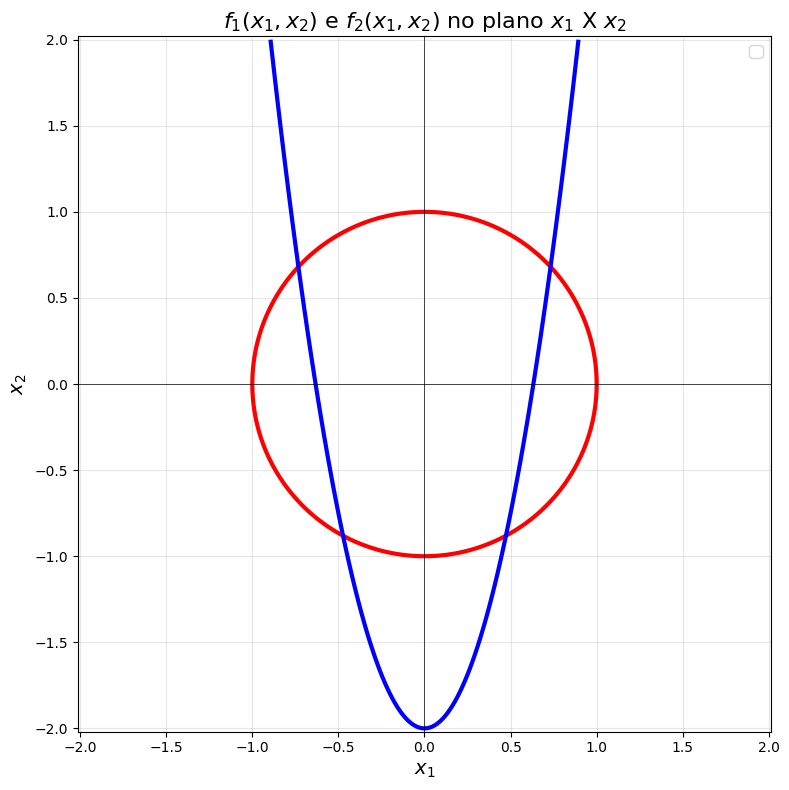

In [46]:
x1 = np.linspace(-2, 2, 400)
x2 = np.linspace(-2, 2, 400)
X1, X2 = np.meshgrid(x1, x2)

F1 = X1**2 + X2**2 - 1    
F2 = 5*X1**2 - X2 - 2   

plt.figure(figsize=(8, 8))
plt.contour(X1, X2, F1, levels=[0], colors='red', linewidths=3, label='$x_1^2 + x_2^2 - 1 = 0$')
plt.contour(X1, X2, F2, levels=[0], colors='blue', linewidths=3, label='$5x_1^2 - x_2 - 2 = 0$')

plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('$f_1(x_1,x_2)$ e $f_2(x_1,x_2)$ no plano $x_1$ X $x_2$', fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.axis('equal')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-2, 2)
plt.ylim(-2, 2)

plt.tight_layout()
plt.show()

# Método de Newton com LU

In [47]:
def lu_decomposition(A):
    n = A.shape[0]
    L = np.eye(n)
    U = A.copy().astype(float)
    
    for k in range(n-1):
        for i in range(k+1, n):
            if U[k, k] == 0:
                raise ValueError("Pivot zero")
            L[i, k] = U[i, k] / U[k, k]
            for j in range(k, n):
                U[i, j] = U[i, j] - L[i, k] * U[k, j]
    
    return L, U

def solve_lu(L, U, b):
    n = L.shape[0]
    
    y = np.zeros(n)
    for i in range(n):
        y[i] = b[i]
        for j in range(i):
            y[i] -= L[i, j] * y[j]
        y[i] /= L[i, i]
    
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = y[i]
        for j in range(i+1, n):
            x[i] -= U[i, j] * x[j]
        x[i] /= U[i, i]
    
    return x

In [91]:
def Newton(f, J, x0, tol=1e-8, max_iter=100):
    x = x0.copy()
    results = []
    
    for k in range(max_iter):
        f_x = f(x)
        J_x = J(x)
        
        results.append({
            'k': k + 1,
            'x': x.copy(),
            'f_norm': np.linalg.norm(f_x),
            'f1': f_x[0],
            'f2': f_x[1]
        })
        
        if np.linalg.norm(f_x) < tol:
            break
        
        try:
            L, U = lu_decomposition(J_x)
            dx = solve_lu(L, U, -f_x)
            x = x + dx
        except ValueError as e:
            print(f"Erro na iteração {k+1}: {e}")
            break
    
    return x, results

## Exercício 1

In [92]:
def f(x):
    x1, x2 = x
    return np.array([
        x1**2 + x2**2 - 1,
        5*x1**2 - x2 - 2
    ])

def J(x):
    x1, x2 = x
    return np.array([
        [2*x1, 2*x2],
        [10*x1, -1]
    ])

In [93]:
def find_analytical_solutions():
    coeffs = [25, 0, -19, 0, 3]
    roots = np.roots(coeffs)
    
    real_roots = [r.real for r in roots if abs(r.imag) < 1e-10]
    
    solutions = []
    for x1 in real_roots:
        x2 = 5*x1**2 - 2
        if abs(x1**2 + x2**2 - 1) < 1e-10: 
            solutions.append(np.array([x1, x2]))
    
    return solutions

In [94]:
analytical_solutions = find_analytical_solutions()
initial_points = [
    np.array([0.5, 1.0]),   
    np.array([-0.5, 1.0]),   
    np.array([0.8, -1.5]), 
    np.array([-0.8, -1.5])   
]

for i, x0 in enumerate(initial_points):
    print(f"\n--- Ponto inicial {i+1}: {x0} ---")
    
    x_star, results = Newton(f, J, x0)
    
    closest_sol = None
    min_dist = float('inf')
    for sol in analytical_solutions:
        dist = np.linalg.norm(x_star - sol)
        if dist < min_dist:
            min_dist = dist
            closest_sol = sol
    
    # Update results with solution info
    for res in results:
        res['solution'] = closest_sol
        res['error_norm'] = np.linalg.norm(res['x'] - closest_sol)

    
    print("\Tabela:")
    print(f"{'k':<3} {'x1':<12} {'x2':<12} {'||f(x)||':<12} {'||x - x*||':<12}")
    print("-" * 50)
    
    for res in results:
        print(f"{res['k']:<3} {res['x'][0]:<12.6f} {res['x'][1]:<12.6f} "
                f"{res['f_norm']:<12.2e} {res['error_norm']:<12.2e}")
    


--- Ponto inicial 1: [0.5 1. ] ---
\Tabela:
k   x1           x2           ||f(x)||     ||x - x*||  
--------------------------------------------------
1   0.500000     1.000000     1.77e+00     3.95e-01    
2   0.795455     0.727273     4.65e-01     7.83e-02    
3   0.734933     0.682318     1.92e-02     2.97e-03    
4   0.732265     0.681026     3.67e-05     5.12e-06    
5   0.732260     0.681025     1.28e-10     1.72e-11    

--- Ponto inicial 2: [-0.5  1. ] ---
\Tabela:
k   x1           x2           ||f(x)||     ||x - x*||  
--------------------------------------------------
1   -0.500000    1.000000     1.77e+00     3.95e-01    
2   -0.795455    0.727273     4.65e-01     7.83e-02    
3   -0.734933    0.682318     1.92e-02     2.97e-03    
4   -0.732265    0.681026     3.67e-05     5.12e-06    
5   -0.732260    0.681025     1.28e-10     1.72e-11    

--- Ponto inicial 3: [ 0.8 -1.5] ---
\Tabela:
k   x1           x2           ||f(x)||     ||x - x*||  
-------------------------------

## Exercício 2

## Graph


/var/folders/zn/rfsv9ts17k3fzwd8pvt9h30r0000gn/T/ipykernel_69638/662646274.py:9: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, F1, levels=[0], colors='red', linewidths=3, label='$x_1^2 + x_2^2 - 1 = 0$')
/var/folders/zn/rfsv9ts17k3fzwd8pvt9h30r0000gn/T/ipykernel_69638/662646274.py:10: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, F2, levels=[0], colors='blue', linewidths=3, label='$5x_1^2 - x_2 - 2 = 0$')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


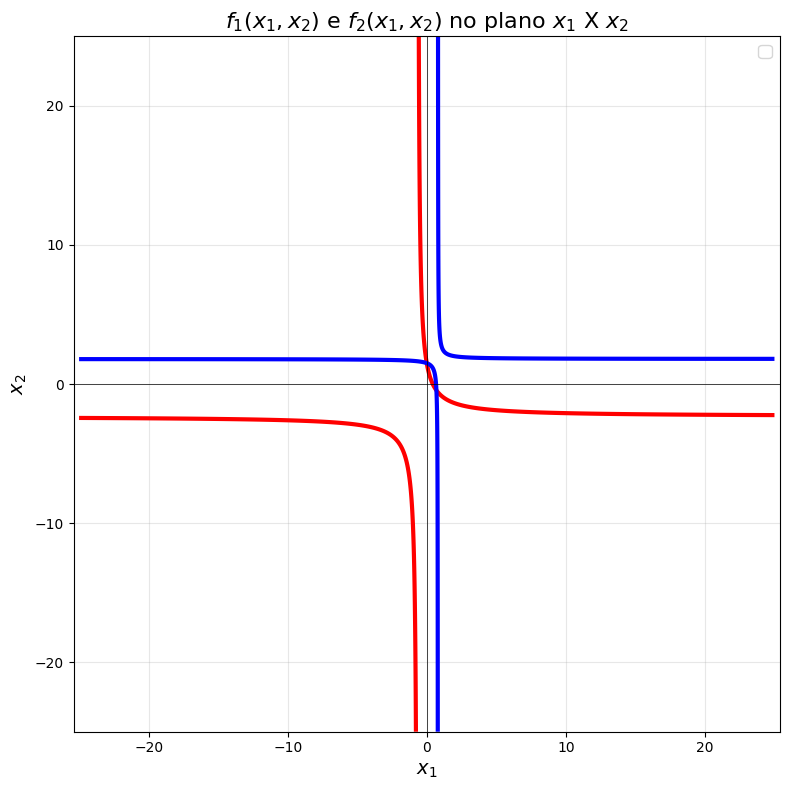

In [101]:
x1 = np.linspace(-25, 25, 1000)
x2 = np.linspace(-25, 25, 1000)
X1, X2 = np.meshgrid(x1, x2)

F1 = 3*X1*X2 + 7*X1 + 2*X2 - 3
F2 = 5*X1*X2 - 9*X1 - 4*X2 + 6 

plt.figure(figsize=(8, 8))
plt.contour(X1, X2, F1, levels=[0], colors='red', linewidths=3, label='$x_1^2 + x_2^2 - 1 = 0$')
plt.contour(X1, X2, F2, levels=[0], colors='blue', linewidths=3, label='$5x_1^2 - x_2 - 2 = 0$')

plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('$f_1(x_1,x_2)$ e $f_2(x_1,x_2)$ no plano $x_1$ X $x_2$', fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.axis('equal')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-25, 25)
plt.ylim(-25, 25)

plt.tight_layout()
plt.show()

In [102]:
def f(x):
    x1, x2 = x
    return np.array([
        3*x1*x2 + 7*x1 + 2*x2 - 3,
        5*x1*x2 - 9*x1 - 4*x2 + 6
    ])

def J(x):
    x1, x2 = x
    return np.array([
        [3*x2 + 7, 3*x1 + 2],
        [5*x2 - 9, 5*x1 -4]
    ])

In [103]:
initial_points = [
    np.array([1, 2]),   
    np.array([-5, -5]),   
]


for i, x0 in enumerate(initial_points):
    print(f"\n--- Ponto inicial {i+1}: {x0} ---")
    
    x_star, results = Newton(f, J, x0)
    
    print("\nIteration table:")
    print(f"{'k':<3} {'x1':<12} {'x2':<12} {'f1(x)':<12} {'f2(x)':<12} {'||f(x)||':<12}")
    print("-" * 70)
    
    for res in results:
        print(f"{res['k']:<3} {res['x'][0]:<12.6f} {res['x'][1]:<12.6f} "
              f"{res['f1']:<12.2e} {res['f2']:<12.2e} {res['f_norm']:<12.2e}")



--- Ponto inicial 1: [1 2] ---

Iteration table:
k   x1           x2           f1(x)        f2(x)        ||f(x)||    
----------------------------------------------------------------------
1   1.000000     2.000000     1.40e+01     -1.00e+00    1.40e+01    
2   -1.375000    5.375000     -2.40e+01    -4.01e+01    4.67e+01    
3   -0.549034    3.047278     -5.77e+00    -9.61e+00    1.12e+01    
4   -0.168249    1.974157     -1.23e+00    -2.04e+00    2.38e+00    
5   -0.027482    1.577450     -1.68e-01    -2.79e-01    3.26e-01    
6   -0.001009    1.502844     -5.93e-03    -9.88e-03    1.15e-02    
7   -0.000001    1.500004     -8.58e-06    -1.43e-05    1.67e-05    
8   -0.000000    1.500000     -1.81e-11    -3.02e-11    3.52e-11    

--- Ponto inicial 2: [-5 -5] ---

Iteration table:
k   x1           x2           f1(x)        f2(x)        ||f(x)||    
----------------------------------------------------------------------
1   -5.000000    -5.000000    2.70e+01     1.96e+02     1.98e+02  

## B, substituindo f2

### Graph

/var/folders/zn/rfsv9ts17k3fzwd8pvt9h30r0000gn/T/ipykernel_69638/644311334.py:9: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, F1, levels=[0], colors='red', linewidths=3, label='$x_1^2 + x_2^2 - 1 = 0$')
/var/folders/zn/rfsv9ts17k3fzwd8pvt9h30r0000gn/T/ipykernel_69638/644311334.py:10: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, F2, levels=[0], colors='blue', linewidths=3, label='$5x_1^2 - x_2 - 2 = 0$')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


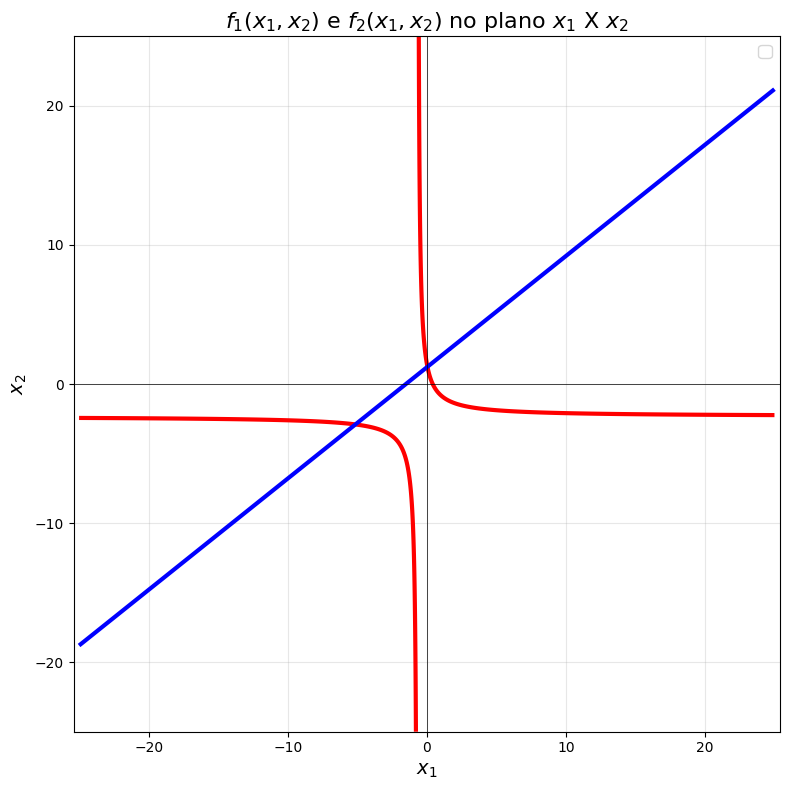

In [104]:
x1 = np.linspace(-25, 25, 1000)
x2 = np.linspace(-25, 25, 1000)
X1, X2 = np.meshgrid(x1, x2)

F1 = 3*X1*X2 + 7*X1 + 2*X2 - 3
F2 = 4*X1 - 5*X2 + 6

plt.figure(figsize=(8, 8))
plt.contour(X1, X2, F1, levels=[0], colors='red', linewidths=3, label='$x_1^2 + x_2^2 - 1 = 0$')
plt.contour(X1, X2, F2, levels=[0], colors='blue', linewidths=3, label='$5x_1^2 - x_2 - 2 = 0$')

plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('$f_1(x_1,x_2)$ e $f_2(x_1,x_2)$ no plano $x_1$ X $x_2$', fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.axis('equal')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-25, 25)
plt.ylim(-25, 25)

plt.tight_layout()
plt.show()

###  Results

In [105]:
def f(x):
    x1, x2 = x
    return np.array([
        3*x1*x2 + 7*x1 + 2*x2 - 3,
        4*x1 - 5*x2 + 6
    ])

def J(x):
    x1, x2 = x
    return np.array([
        [3*x2 + 7, 3*x1 + 2],
        [4, -5]
    ])

In [106]:
initial_points = [
    np.array([1, 2]),   
    np.array([-1, -2]),  
    np.array([-5, -5]),   
]

for i, x0 in enumerate(initial_points):
    print(f"\n--- Ponto inicial {i+1}: {x0} ---")
    
    x_star, results = Newton(f, J, x0)
    
    print("\nIteration table:")
    print(f"{'k':<3} {'x1':<12} {'x2':<12} {'f1(x)':<12} {'f2(x)':<12} {'||f(x)||':<12}")
    print("-" * 70)
    
    for res in results:
        print(f"{res['k']:<3} {res['x'][0]:<12.6f} {res['x'][1]:<12.6f} "
              f"{res['f1']:<12.2e} {res['f2']:<12.2e} {res['f_norm']:<12.2e}")

    


--- Ponto inicial 1: [1 2] ---

Iteration table:
k   x1           x2           f1(x)        f2(x)        ||f(x)||    
----------------------------------------------------------------------
1   1.000000     2.000000     1.40e+01     0.00e+00     1.40e+01    
2   0.176471     1.341176     1.63e+00     8.88e-16     1.63e+00    
3   0.051716     1.241373     3.74e-02     0.00e+00     3.74e-02    
4   0.048715     1.238972     2.16e-05     0.00e+00     2.16e-05    
5   0.048714     1.238971     7.25e-12     0.00e+00     7.25e-12    

--- Ponto inicial 2: [-1 -2] ---

Iteration table:
k   x1           x2           f1(x)        f2(x)        ||f(x)||    
----------------------------------------------------------------------
1   -1.000000    -2.000000    -8.00e+00    1.20e+01     1.44e+01    
2   51.000000    42.000000    6.86e+03     0.00e+00     6.86e+03    
3   24.291829    20.633463    1.71e+03     -1.42e-14    1.71e+03    
4   11.000113    10.000090    4.24e+02     1.42e-14     4.24e+02  